## It is 15 July morning and FIFA world cup 2018. This has motivated me to analyze this data set, let's explore and see what the FIFA history says!


 <img src='fifa.jpg'style="width:600px;">

In [167]:
#imports
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab
import warnings
warnings.filterwarnings('ignore')

In [21]:
worldCup = pd.read_csv('WorldCups.csv')
matches = pd.read_csv('WorldCupMatches.csv')
players = pd.read_csv('WorldCupPlayers.csv')

### Let's look at the worldcups data:

In [5]:
worldCup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [6]:
worldCup.replace(to_replace="Germany FR", value="Germany",inplace=True)

### Let's look at the players data

In [7]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


### Let's look at worldCup matches data:

In [56]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


### The goals scored all over the world cups

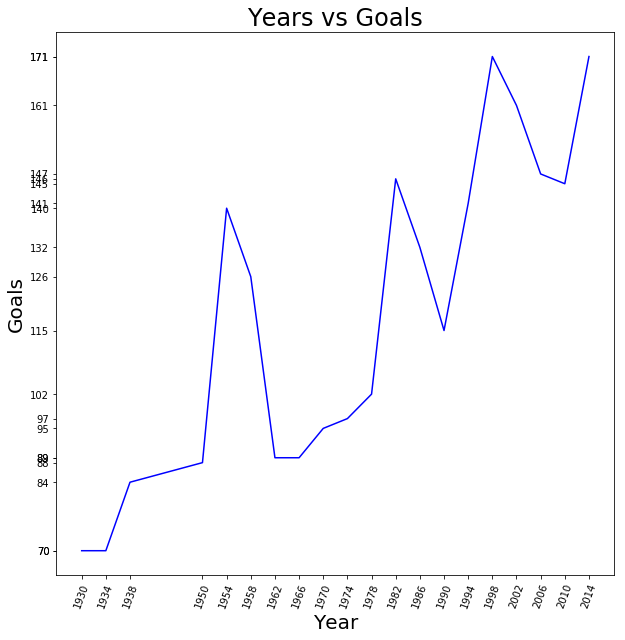

In [110]:

plt.figure(figsize=(10, 10))
plt.xticks(worldCup.Year, rotation=70)
plt.yticks(worldCup.GoalsScored)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Goals",fontsize=20)
plt.title("Years vs Goals",fontsize=24)
plt.plot(worldCup.Year, worldCup.GoalsScored, color='blue')
plt.show()

Looks like there were no championships in the year 1942 and 1946 :( The highest goals were in the year 1998 with total of 171

### The participation of the teams

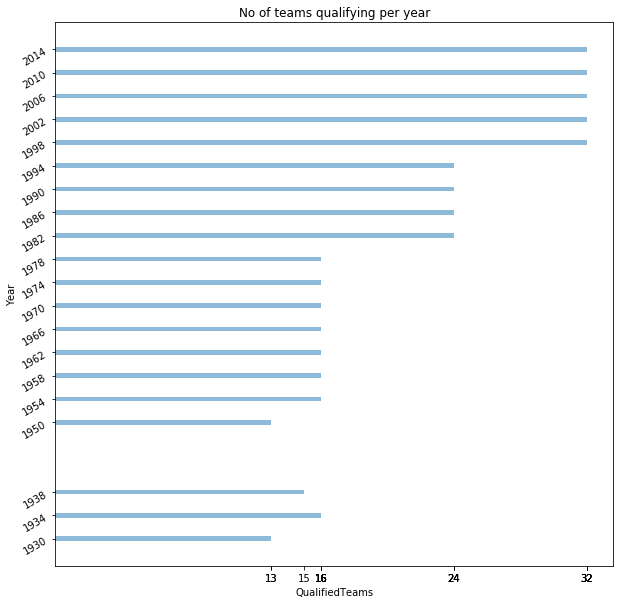

In [279]:
#Teams qualifying per year
plt.figure(figsize=(10, 10))
plt.barh(worldCup.Year,worldCup.QualifiedTeams,alpha=0.5) 
plt.ylabel('Year')
plt.xlabel('QualifiedTeams')
plt.yticks(worldCup.Year, rotation=30)
plt.xticks(worldCup.QualifiedTeams)
plt.title('No of teams qualifying per year')
plt.show()

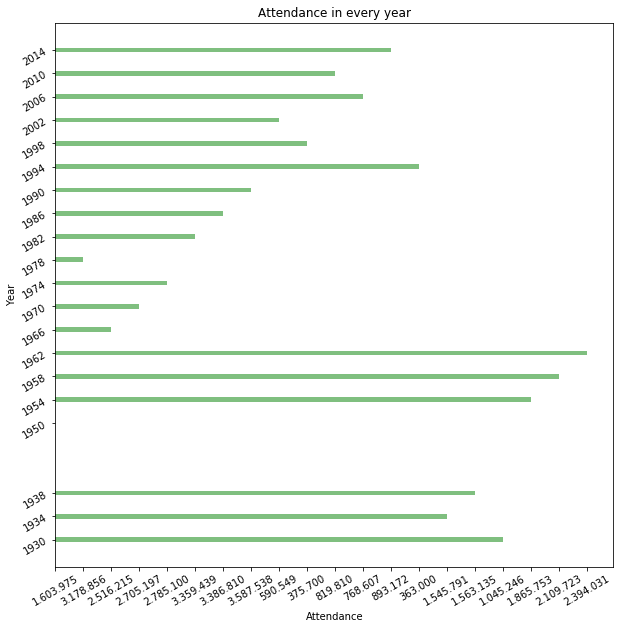

In [146]:

#Attendance per year
plt.figure(figsize=(10, 10))
plt.barh(worldCup.Year,worldCup.Attendance,alpha=0.5,color='green') 
plt.ylabel('Year')
plt.xlabel('Attendance')
plt.yticks(worldCup.Year, rotation=30)
plt.xticks(worldCup.Attendance, rotation=30)
plt.title('Attendance in every year')
plt.show()

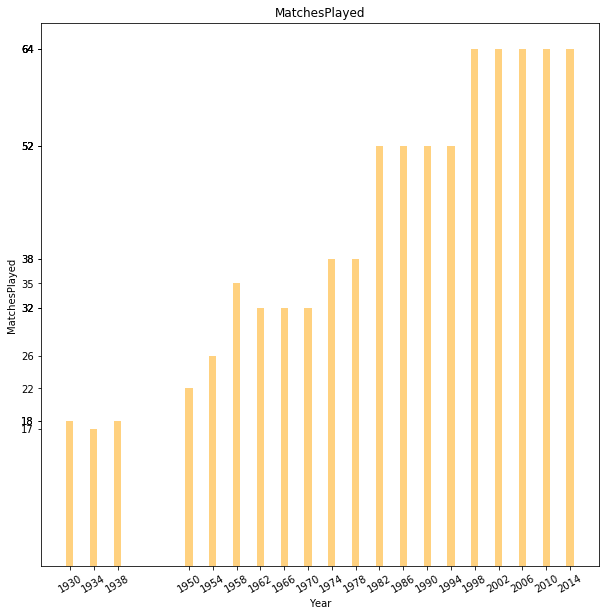

In [280]:
#MatchesPlayed per year
plt.figure(figsize=(10, 10))
plt.bar(worldCup.Year,worldCup.MatchesPlayed,width =1.2,alpha=0.5,color='orange') 
plt.xlabel('Year')
plt.ylabel('MatchesPlayed')
plt.xticks(worldCup.Year, rotation=30)
plt.yticks(worldCup.MatchesPlayed)
plt.title('MatchesPlayed')
plt.show()

### Let's look at the winners over the years

In [281]:
%matplotlib inline
import matplotlib.pyplot as plt


x=worldCup['Winner'].value_counts()[:]
y =worldCup['Runners-Up'].value_counts()[:]
z = worldCup['Third'].value_counts()[:]
s = worldCup['Fourth'].value_counts()[:]
results = pd.concat([x, y, z,s], axis=1)

results = results.sort_values(by=['Winner', 'Runners-Up', 'Third','Fourth'], ascending=False)
results = results.fillna(value=0)
results 


,Winner,Runners-Up,Third,Fourth
Brazil,5.0,2.0,2.0,2.0
Germany,4.0,4.0,4.0,1.0
Italy,4.0,2.0,1.0,1.0
Argentina,2.0,3.0,0.0,0.0
Uruguay,2.0,0.0,0.0,3.0
France,1.0,1.0,2.0,1.0
England,1.0,0.0,0.0,1.0
Spain,1.0,0.0,0.0,1.0
Netherlands,0.0,3.0,1.0,1.0
Czechoslovakia,0.0,2.0,0.0,0.0


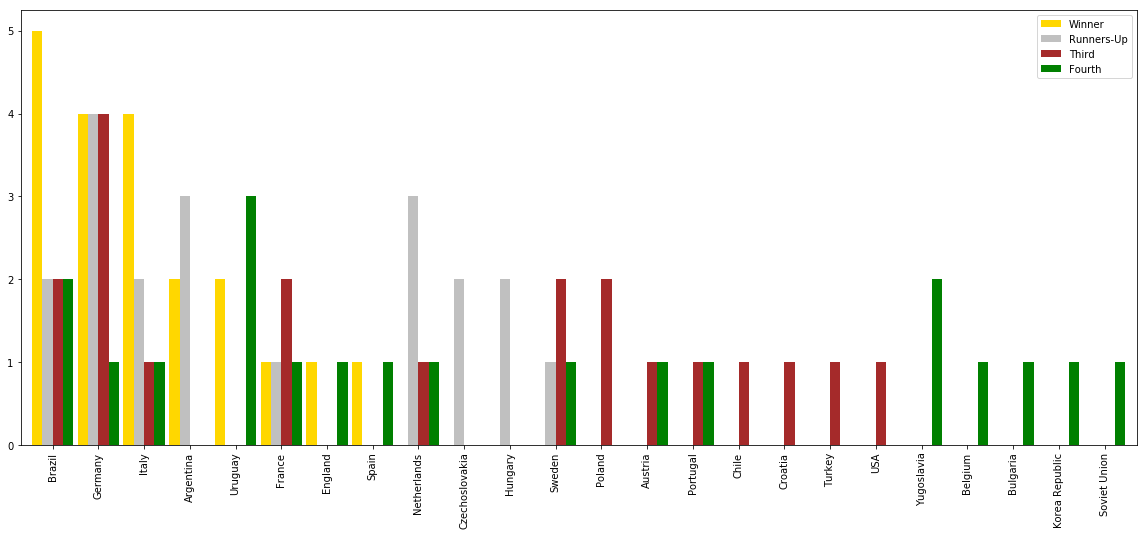

In [283]:
results.plot(y=['Winner', 'Runners-Up', 'Third','Fourth'], kind="bar", 
                  color =['gold','silver','brown','green'], figsize=(20, 8), width=0.9)

Looks like Brazi, Germany, and Italy have performed the best all these years. hmmm.. Well, I see France has won only 1 gold, 1 silver, 2 bronze, and, 1 fourth.
2018 FIFA world cup results are unpredicatble indeed! :p


### The number of goals by each country 

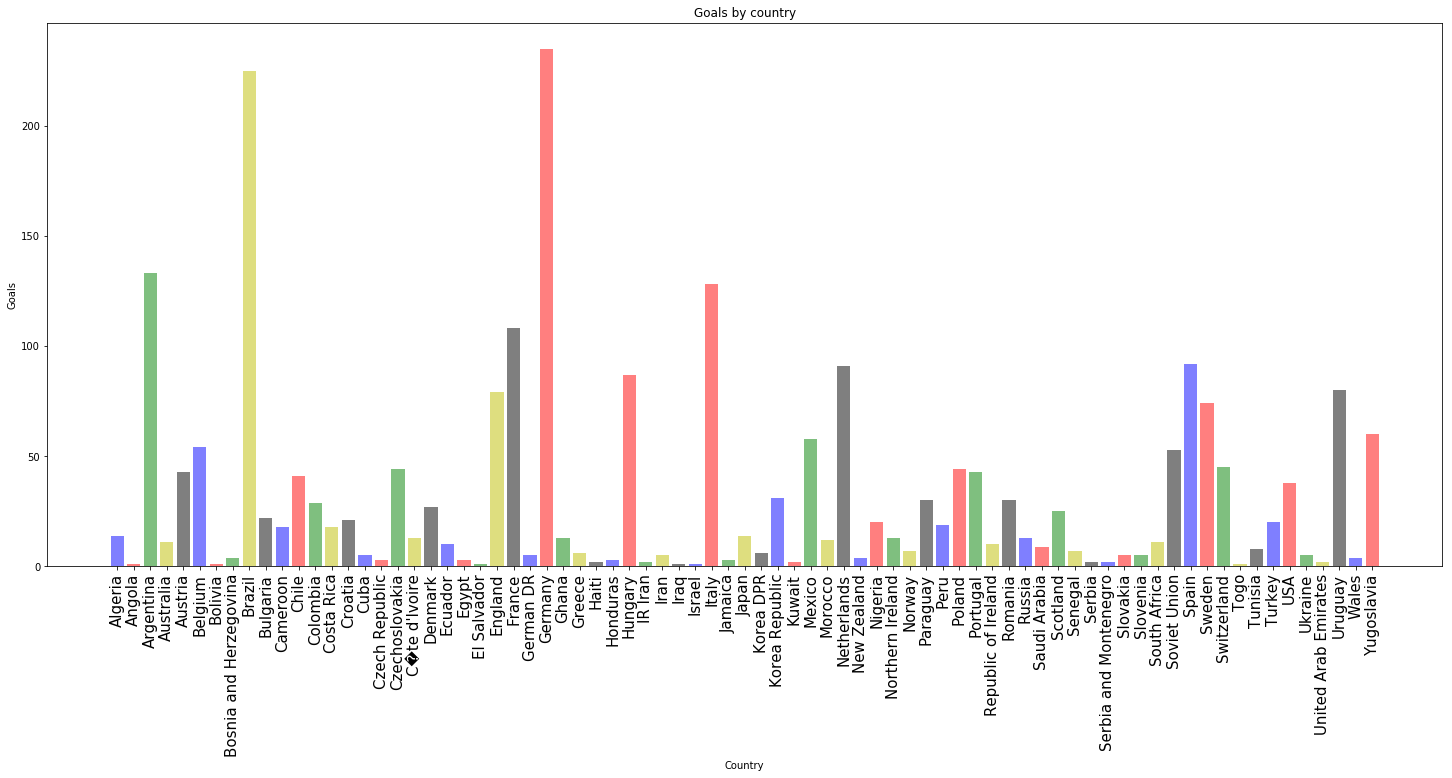

In [64]:

from itertools import cycle, islice

matches.replace(to_replace="Germany FR", value="Germany",inplace=True)
matches = matches.replace(to_replace='rn">', value = "" , regex=True)
goals1 = matches.groupby(['Home Team Name'],as_index=False)[["Home Team Goals"]].sum()
goals2 = matches.groupby(['Away Team Name'],as_index=False)[["Away Team Goals"]].sum()

goals1 =goals1.rename(index=str, columns={"Home Team Name": "country", "Home Team Goals": "goals1"})
goals2 =goals2.rename(index=str, columns={"Away Team Name": "country", "Away Team Goals": "goals2"})


goals =goals1.merge(goals2, left_on='country', right_on='country', how='outer')
goals = goals.fillna(value=0)
goals['total_goals'] = goals['goals1'] + goals['goals2']
goals = goals.drop(['goals1', 'goals2'], axis=1)

goals = goals[goals.total_goals != 0]
goals.sort_values(by=['total_goals'], ascending=False, inplace =True)
goals.reset_index(drop=True,inplace=True)

key = goals['country']
goals = goals.iloc[key.argsort()]

my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(goals)))
plt.figure(figsize=(25, 10))
plt.bar(goals.country,goals.total_goals,alpha=0.5, color=my_colors) 
plt.xlabel('Country')
plt.ylabel('Goals')
plt.xticks(goals.country, rotation=90, size=15)
plt.title('Goals by country')
plt.show()

### The most famous players

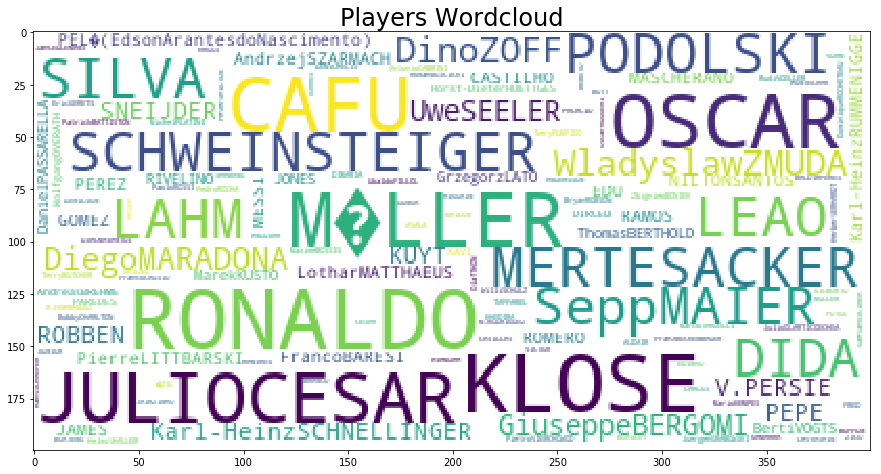

In [59]:

import wordcloud
plt.figure(figsize=(15,15))
famous_players = players["Player Name"]

famous_players = famous_players.str.replace(' ', '')
counts = famous_players.value_counts().to_dict()


wordcloud = wordcloud.WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40 
                         ).generate_from_frequencies(counts)

plt.imshow(wordcloud)
plt.title("Players Wordcloud",fontsize=24)
plt.show()

#### The counts: 'RONALDO': 33, 'KLOSE': 32, 'M�LLER': 28, 'OSCAR': 28

#### Face off : Belgium vs England  <img src='Bel.png'style="width:20px;"><img src='eng.jpg'style="width:20px;">

['1930.0' '1934.0' '1938.0' '1950.0' '1954.0' '1958.0' '1962.0' '1966.0'
 '1970.0' '1982.0' '1986.0' '1990.0' '1994.0' '1998.0' '2002.0' '2006.0'
 '2010.0' '2014.0']


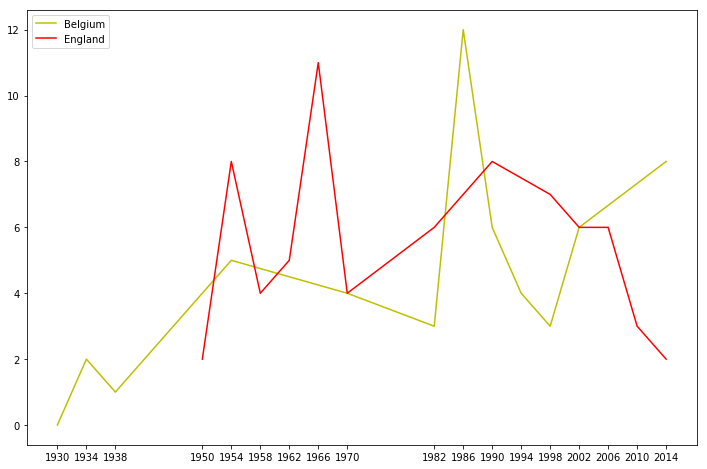

In [165]:

matches.rename(columns={'Home Team Name': 'HomeTeamName', 'Away Team Name': 'AwayTeamName'}, inplace=True)
teams = ['Belgium','England']
belVsEng = matches.loc[matches.HomeTeamName.isin(teams) | matches.AwayTeamName.isin(teams)]

England_faceoff = belVsEng.loc[(belVsEng['HomeTeamName']=='England')| (belVsEng['AwayTeamName']=='England')]




for i in England_faceoff.index:
    if England_faceoff.at[i,'HomeTeamName']=='England':
        England_faceoff.at[i, 'goals'] = England_faceoff.at[i,'Home Team Goals']
        England_faceoff.at[i, 'country'] = England_faceoff.at[i,'HomeTeamName']
    else:
        England_faceoff.at[i, 'goals'] = England_faceoff.at[i,'Away Team Goals']
        England_faceoff.at[i, 'country'] = England_faceoff.at[i,'AwayTeamName']

England_faceoff =England_faceoff.reset_index()


England_faceoff_goals=pd.DataFrame()
England_faceoff_goals=England_faceoff[['Year','country','goals']]
England_faceoff_goals
England_faceoff_Yeargoals = England_faceoff_goals.groupby(['Year','country'], as_index=False).sum()



### Same for Belgium:

Belgium_faceoff = belVsEng.loc[(belVsEng['HomeTeamName']=='Belgium')| (belVsEng['AwayTeamName']=='Belgium')]
for i in Belgium_faceoff.index:
    if Belgium_faceoff.at[i,'HomeTeamName']=='Belgium':
        Belgium_faceoff.at[i, 'goals'] = Belgium_faceoff.at[i,'Home Team Goals']
        Belgium_faceoff.at[i, 'country'] = Belgium_faceoff.at[i,'HomeTeamName']
    else:
        Belgium_faceoff.at[i, 'goals'] = Belgium_faceoff.at[i,'Away Team Goals']
        Belgium_faceoff.at[i, 'country'] = Belgium_faceoff.at[i,'AwayTeamName']

Belgium_faceoff =Belgium_faceoff.reset_index()


Belgium_faceoff_goals=pd.DataFrame()
Belgium_faceoff_goals=Belgium_faceoff[['Year','country','goals']]
Belgium_faceoff_goals.reset_index()
Belgium_faceoff_Yeargoals = Belgium_faceoff_goals.groupby(['Year','country'], as_index=False).sum()



years=[]
years1 =Belgium_faceoff_Yeargoals.Year
years2 =England_faceoff_Yeargoals.Year
years = years1.append(years2)

years_array = pd.Series(years).values
years_array = np.unique(years_array)

years_array_string = years_array.astype(np.str)
print(years_array_string)

plt.figure(figsize=(12, 8))
plt.plot(Belgium_faceoff_Yeargoals.Year, Belgium_faceoff_Yeargoals.goals, '-y', label='Belgium')
plt.plot(England_faceoff_Yeargoals.Year, England_faceoff_Yeargoals.goals,'-r', label='England')
plt.legend(loc='upper left')
plt.xticks(years_array)
plt.show()


#### Face Off: France Vs Croatia <img src='France.jpg'style="width:20px;"><img src='Cro.png'style="width:20px;">

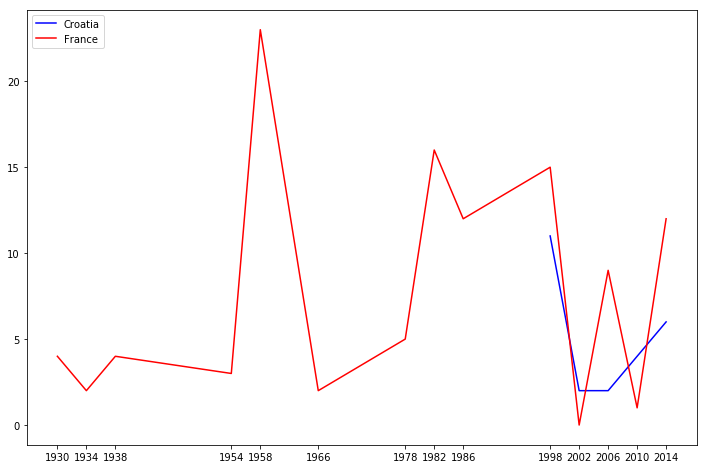

In [166]:

matches.rename(columns={'Home Team Name': 'HomeTeamName', 'Away Team Name': 'AwayTeamName'}, inplace=True)
teams = ['France','Croatia']
franvsCro = matches.loc[matches.HomeTeamName.isin(teams) | matches.AwayTeamName.isin(teams)]

France_faceoff = franvsCro.loc[(franvsCro['HomeTeamName']=='France')| (franvsCro['AwayTeamName']=='France')]




for i in France_faceoff.index:
    if France_faceoff.at[i,'HomeTeamName']=='France':
        France_faceoff.at[i, 'goals'] = France_faceoff.at[i,'Home Team Goals']
        France_faceoff.at[i, 'country'] = France_faceoff.at[i,'HomeTeamName']
    else:
        France_faceoff.at[i, 'goals'] = France_faceoff.at[i,'Away Team Goals']
        France_faceoff.at[i, 'country'] = France_faceoff.at[i,'AwayTeamName']

France_faceoff =France_faceoff.reset_index()


France_faceoff_goals=pd.DataFrame()
France_faceoff_goals=France_faceoff[['Year','country','goals']]
##France_faceoff_goals
France_faceoff_Yeargoals = France_faceoff_goals.groupby(['Year','country'], as_index=False).sum()


### Same for Croatia:

Croatia_faceoff = franvsCro.loc[(franvsCro['HomeTeamName']=='Croatia')| (franvsCro['AwayTeamName']=='Croatia')]
for i in Croatia_faceoff.index:
    if Croatia_faceoff.at[i,'HomeTeamName']=='Croatia':
        Croatia_faceoff.at[i, 'goals'] = Croatia_faceoff.at[i,'Home Team Goals']
        Croatia_faceoff.at[i, 'country'] = Croatia_faceoff.at[i,'HomeTeamName']
    else:
        Croatia_faceoff.at[i, 'goals'] = Croatia_faceoff.at[i,'Away Team Goals']
        Croatia_faceoff.at[i, 'country'] = Croatia_faceoff.at[i,'AwayTeamName']

Croatia_faceoff =Croatia_faceoff.reset_index()


Croatia_faceoff_goals=pd.DataFrame()

Croatia_faceoff_goals=Croatia_faceoff[['Year','country','goals']]
Croatia_faceoff_goals.reset_index()
Croatia_faceoff_Yeargoals = Croatia_faceoff_goals.groupby(['Year','country'], as_index=False).sum()

#print(Croatia_faceoff_goals)

years=[]
years1 =France_faceoff_Yeargoals.Year
years2 =Croatia_faceoff_Yeargoals.Year
years = years1.append(years2)

years_array = pd.Series(years).values
years_array = np.unique(years_array)

years_array_string = years_array.astype(np.str)
#print(years_array_string)

plt.figure(figsize=(12, 8))
plt.plot(Croatia_faceoff_Yeargoals.Year, Croatia_faceoff_Yeargoals.goals, '-b', label='Croatia')
plt.plot(France_faceoff_Yeargoals.Year, France_faceoff_Yeargoals.goals,'-r', label='France')
plt.legend(loc='upper left')
plt.xticks(years_array)
plt.show()


#### Croatia started playing only in year 1998. Now that is really impressive!